# Assignment 6.1
## Generating datasets with alpha equal to 0.2

In [9]:
import numpy as np #numerical tools
import scipy.signal as sp #signal processing tools
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

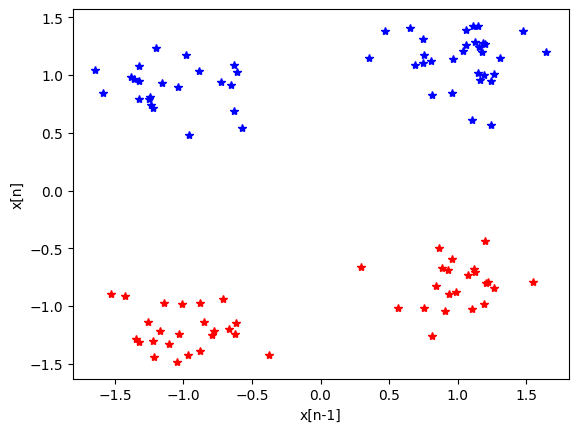

In [10]:
def data(N,a):
   N=N+3
   h=np.array([1,a])
   y=np.sign(np.random.randn(N,1))
   y=np.reshape(y,len(y))
   t=np.arange(N)
   z=np.convolve(h,y)
   z=z[1:N-1]
   y=y[2:N-1]
   X=np.array([z[0:N-3],z[1:N-2]])+0.2*np.random.randn(2,N-3)
   return X,y

X,y=data(100,0.2)

ind1=np.where(y==1)
ind2=np.where(y==-1)
plt.plot(X[0,ind1],X[1,ind1],'b*')
plt.plot(X[0,ind2],X[1,ind2],'r*')
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.show()


## Volterra Expansion
### 1, x[n], x[n-1], x1^2, x2^2, x1*x2, x1^3, x2^3, x1^2*x2, x1*x2^2

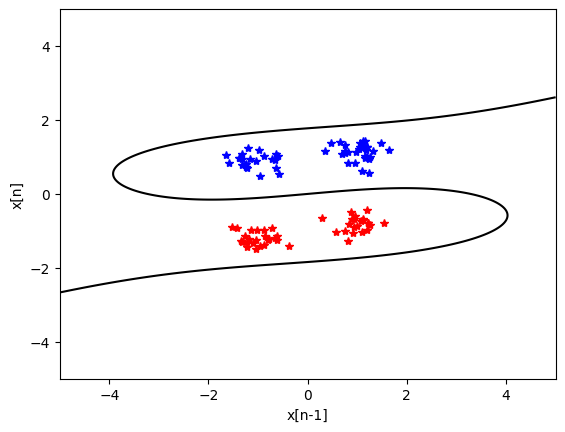

Weights of the MMSE solution:
[ 0.00000000e+00 -1.82151861e-01  1.53591637e+00 -9.10367529e-04
 -3.10398732e-02  8.35091855e-03  1.71513330e-02 -4.69499860e-01
 -2.71018865e-02  1.47661827e-01]


In [11]:
def volterra_expansion(X):
    N = X.shape[1]
    X_volterra = np.zeros((10, N))
    
    for n in range(N):
        x_n = X[:, n]                             # x[n], x[n-1]
        X_volterra[0, n] = 1                      # Constant term        # 0th order
        X_volterra[1, n] = x_n[0]                 # x[n]                 # 1st order
        X_volterra[2, n] = x_n[1]                 # x[n-1]               # 1st order 
        X_volterra[3, n] = x_n[0]**2              # x1^2                 # 2nd order
        X_volterra[4, n] = x_n[1]**2              # x2^2                 # 2nd order
        X_volterra[5, n] = x_n[0] * x_n[1]        # x1*x2                # 2nd order
        X_volterra[6, n] = x_n[0]**3              # x1^3                 # 3rd order
        X_volterra[7, n] = x_n[1]**3              # x2^3                 # 3rd order
        X_volterra[8, n] = x_n[0]**2 * x_n[1]     # x1^2*x2              # 3rd order
        X_volterra[9, n] = x_n[0] * x_n[1]**2     # x1*x2^2              # 3rd order

        # Total Equation is
        # 1, x[n], x[n-1], x1^2, x2^2, x1*x2, x1^3, x2^3, x1^2*x2, x1*x2^2
        
    return X_volterra

## Apply Volterra expansion to the data
X_volterra = volterra_expansion(X)

## Compute MMSE solution
Model = LinearRegression().fit(X_volterra.T, y)
w_mmse = Model.coef_

## Generate decision boundary
# Define a grid of points in the input space
num_points = 400
x_values = np.linspace(-5, 5, num_points)
y_values = np.linspace(-5, 5, num_points)
x_meshgrid, y_meshgrid = np.meshgrid(x_values, y_values)
# Create a matrix containing all pairs of x and y coordinates
X_boundary = np.vstack((x_meshgrid.ravel(), y_meshgrid.ravel()))
# Apply the Volterra expansion to the grid points
X_volterra_boundary = volterra_expansion(X_boundary)
# Compute the decision boundary using the MMSE weights and Volterra-expanded data
decision_boundary = np.dot(w_mmse, X_volterra_boundary)


## Plot the decision boundary and data points
plt.contour(x_meshgrid, y_meshgrid, decision_boundary.reshape(x_meshgrid.shape), levels=[0], colors='black')
plt.plot(X[0,ind1],X[1,ind1],'b*') # Plotting the data where y = 1 
plt.plot(X[0,ind2],X[1,ind2],'r*') # Plotting the data where y = -1
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
lim = 5
plt.xlim([-lim, lim])
plt.ylim([-lim, lim])
plt.show()

## Print the weights of the MMSE solution
print("Weights of the MMSE solution:")
print(w_mmse)

## Volterra Expansion
### x[n], x[n-1], x1^2, x2^2, x1*x2, x1^3, x2^3, x1^2*x2, x1*x2^2, x1^2*x2^2

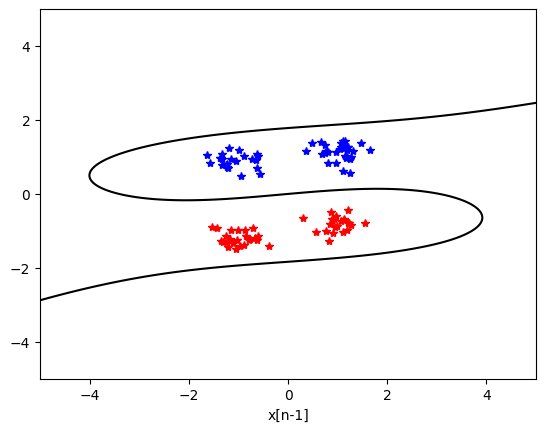

Weights of the MMSE solution:
[-0.18264753  1.5348026   0.00625248 -0.02469643  0.00893762  0.01756664
 -0.46887128 -0.02662835  0.14739903 -0.0065826 ]


In [12]:
def volterra_expansion(X):
    N = X.shape[1]
    X_volterra = np.zeros((10, N))
    
    for n in range(N):
        x_n = X[:, n]                             # x[n], x[n-1]
        X_volterra[0, n] = x_n[0]                 # x[n]               # 1 st order
        X_volterra[1, n] = x_n[1]                 # x[n-1]             # 1 st order
        X_volterra[2, n] = x_n[0]**2              # x1^2               # 2 nd order
        X_volterra[3, n] = x_n[1]**2              # x2^2               # 2 nd order
        X_volterra[4, n] = x_n[0] * x_n[1]        # x1*x2              # 2 nd order
        X_volterra[5, n] = x_n[0]**3              # x1^3               # 3 rd order
        X_volterra[6, n] = x_n[1]**3              # x2^3               # 3 rd order
        X_volterra[7, n] = x_n[0]**2 * x_n[1]     # x1^2*x2            # 3 rd order
        X_volterra[8, n] = x_n[0] * x_n[1]**2     # x1*x2^2            # 3 rd order
        X_volterra[9, n] = x_n[0]**2 * x_n[1]**2  # x1^2*x2^2          # 4 th order

        # Total Equation is
        # x[n], x[n-1], x1^2, x2^2, x1*x2, x1^3, x2^3, x1^2*x2, x1*x2^2, x1^2*x2^2
        
    return X_volterra

## Apply Volterra expansion to the data
X_volterra = volterra_expansion(X)

## Compute MMSE solution
Model = LinearRegression().fit(X_volterra.T, y)
w_mmse = Model.coef_

## Generate decision boundary
# Define a grid of points in the input space
num_points = 400
x_values = np.linspace(-5, 5, num_points)
y_values = np.linspace(-5, 5, num_points)
x_meshgrid, y_meshgrid = np.meshgrid(x_values, y_values)
# Create a matrix containing all pairs of x and y coordinates
X_boundary = np.vstack((x_meshgrid.ravel(), y_meshgrid.ravel()))
# Apply the Volterra expansion to the grid points
X_volterra_boundary = volterra_expansion(X_boundary)
# Compute the decision boundary using the MMSE weights and Volterra-expanded data
decision_boundary = np.dot(w_mmse, X_volterra_boundary)


## Plot the decision boundary and data points
plt.contour(x_meshgrid, y_meshgrid, decision_boundary.reshape(x_meshgrid.shape), levels=[0], colors='black')
plt.plot(X[0,ind1],X[1,ind1],'b*') # Plotting the data where y = 1 
plt.plot(X[0,ind2],X[1,ind2],'r*') # Plotting the data where y = -1
plt.xlabel('x[n-1]')
lim = 5
plt.xlim([-lim, lim])
plt.ylim([-lim, lim])
plt.show()

## Print the weights of the MMSE solution
print("Weights of the MMSE solution:")
print(w_mmse)

## Volterra Expansion
### x1^2, x2^2, x1*x2, x1^3, x2^3, x1^2*x2, x1*x2^2, x1^4, x2^4, x1^2*x2^2

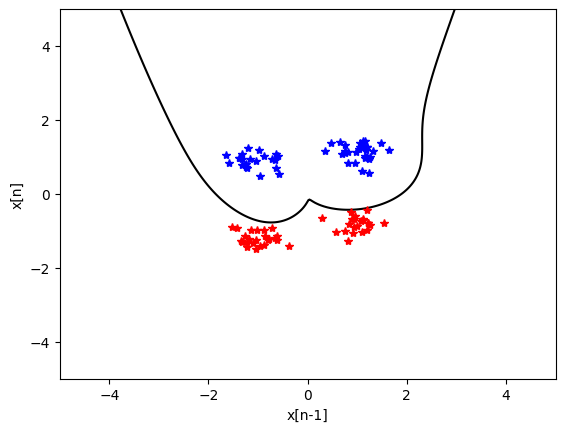

Weights of the MMSE solution:
[ 0.45710709  0.07713251  0.12995223  0.00468961  0.38919415  0.42523441
 -0.2393357  -0.13017923  0.01025351 -0.24518459]


In [13]:
def volterra_expansion(X):
    N = X.shape[1]
    X_volterra = np.zeros((10, N))
    
    for n in range(N):
        x_n = X[:, n]                             # x[n], x[n-1]
        X_volterra[0, n] = x_n[0]**2              # x1^2               # 2 nd order
        X_volterra[1, n] = x_n[1]**2              # x2^2               # 2 nd order
        X_volterra[2, n] = x_n[0] * x_n[1]        # x1*x2              # 2 nd order
        X_volterra[3, n] = x_n[0]**3              # x1^3               # 3 rd order 
        X_volterra[4, n] = x_n[1]**3              # x2^3               # 3 rd order 
        X_volterra[5, n] = x_n[0]**2 * x_n[1]     # x1^2*x2            # 3 rd order
        X_volterra[6, n] = x_n[0] * x_n[1]**2     # x1*x2^2            # 3 rd order
        X_volterra[7, n] = x_n[0]**4              # x1^4               # 4 th order
        X_volterra[8, n] = x_n[1]**4              # x2^4               # 4 th order
        X_volterra[9, n] = x_n[0]**2 * x_n[1]**2  # x1^2*x2^2          # 4 th order

        # Total Equation is
        # x1^2, x2^2, x1*x2, x1^3, x2^3, x1^2*x2, x1*x2^2, x1^4, x2^4, x1^2*x2^2
        
    return X_volterra

## Apply Volterra expansion to the data
X_volterra = volterra_expansion(X)

## Compute MMSE solution
Model = LinearRegression().fit(X_volterra.T, y)
w_mmse = Model.coef_

## Generate decision boundary
# Define a grid of points in the input space
num_points = 400
x_values = np.linspace(-5, 5, num_points)
y_values = np.linspace(-5, 5, num_points)
x_meshgrid, y_meshgrid = np.meshgrid(x_values, y_values)
# Create a matrix containing all pairs of x and y coordinates
X_boundary = np.vstack((x_meshgrid.ravel(), y_meshgrid.ravel()))
# Apply the Volterra expansion to the grid points
X_volterra_boundary = volterra_expansion(X_boundary)
# Compute the decision boundary using the MMSE weights and Volterra-expanded data
decision_boundary = np.dot(w_mmse, X_volterra_boundary)


## Plot the decision boundary and data points
plt.contour(x_meshgrid, y_meshgrid, decision_boundary.reshape(x_meshgrid.shape), levels=[0], colors='black')
plt.plot(X[0,ind1],X[1,ind1],'b*') # Plotting the data where y = 1 
plt.plot(X[0,ind2],X[1,ind2],'r*') # Plotting the data where y = -1
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.show()

## Print the weights of the MMSE solution
print("Weights of the MMSE solution:")
print(w_mmse)

## Volterra Expansion
### x1^3, x2^3, x1^2*x2, x1*x2^2, x1^4, x2^4, x1^2*x2^2, x1^3*x2, x1*x2^3, x1^5

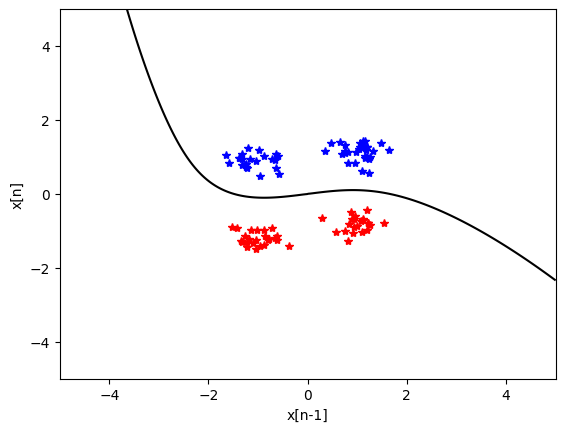

Weights of the MMSE solution:
[-6.82775850e-02  3.88902165e-01  4.18337283e-01 -2.11402196e-01
 -4.72328813e-03  5.54623417e-06 -1.54482402e-01  5.73339723e-02
  3.31854198e-02  2.77657366e-02]


In [14]:
def volterra_expansion(X):
    N = X.shape[1]
    X_volterra = np.zeros((10, N))
    
    for n in range(N):
        x_n = X[:, n]                             # x[n], x[n-1]
        X_volterra[0, n] = x_n[0]**3              # x1^3               # 3 rd order 
        X_volterra[1, n] = x_n[1]**3              # x2^3               # 3 rd order 
        X_volterra[2, n] = x_n[0]**2 * x_n[1]     # x1^2*x2            # 3 rd order 
        X_volterra[3, n] = x_n[0] * x_n[1]**2     # x1*x2^2            # 3 rd order
        X_volterra[4, n] = x_n[0]**4              # x1^4               # 4 th order
        X_volterra[5, n] = x_n[1]**4              # x2^4               # 4 th order
        X_volterra[6, n] = x_n[0]**2 * x_n[1]**2  # x1^2*x2^2          # 4 th order
        X_volterra[7, n] = x_n[0]**3 * x_n[1]     # x1^3*x2            # 4 th order
        X_volterra[8, n] = x_n[0] * x_n[1]**3     # x1*x2^3            # 4 th order
        X_volterra[9, n] = x_n[0]**5              # x1^5               # 5 th order

        # Total Equation is
        # x1^3, x2^3, x1^2*x2, x1*x2^2, x1^4, x2^4, x1^2*x2^2, x1^3*x2, x1*x2^3, x1^5
        
    return X_volterra

## Apply Volterra expansion to the data
X_volterra = volterra_expansion(X)

## Compute MMSE solution
Model = LinearRegression().fit(X_volterra.T, y)
w_mmse = Model.coef_

## Generate decision boundary
# Define a grid of points in the input space
num_points = 400
x_values = np.linspace(-5, 5, num_points)
y_values = np.linspace(-5, 5, num_points)
x_meshgrid, y_meshgrid = np.meshgrid(x_values, y_values)
# Create a matrix containing all pairs of x and y coordinates
X_boundary = np.vstack((x_meshgrid.ravel(), y_meshgrid.ravel()))
# Apply the Volterra expansion to the grid points
X_volterra_boundary = volterra_expansion(X_boundary)
# Compute the decision boundary using the MMSE weights and Volterra-expanded data
decision_boundary = np.dot(w_mmse, X_volterra_boundary)


## Plot the decision boundary and data points
plt.contour(x_meshgrid, y_meshgrid, decision_boundary.reshape(x_meshgrid.shape), levels=[0], colors='black')
plt.plot(X[0,ind1],X[1,ind1],'b*') # Plotting the data where y = 1 
plt.plot(X[0,ind2],X[1,ind2],'r*') # Plotting the data where y = -1
plt.xlabel('x[n-1]')
plt.ylabel('x[n]')
plt.show()

## Print the weights of the MMSE solution
print("Weights of the MMSE solution:")
print(w_mmse)